## Contents
**regions2**
1. 1

## Imports

In [1]:
import matplotlib
import aplpy
from astropy.visualization import astropy_mpl_style
import math as m
import scipy.optimize as opt
import statistics as st

from regions import Regions
from regions.core import PixCoord
from regions.shapes import RectangleSkyRegion, RectanglePixelRegion

import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import Angle, SkyCoord
from astropy.utils.data import get_pkg_data_filename
from astropy import units as u
import numpy as np

matplotlib.rcParams.update({'font.size': 11})


## Opening files

In [2]:
regions_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/regions2.reg'
orion_A_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/Planck_353GHz_2048_l212.0_b-19.0_w8_fwhm10.fits'
orion_A_cov_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/Planck_353GHz_2048_l212.0_b-19.0_w8_fwhm10_cov.fits'
col_dens_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/Planck_353GHz_2048_l212.0_b-19.0_w8_fwhm6_dust.fits'

orion_A_data = get_pkg_data_filename(orion_A_file)
orion_A = fits.open(orion_A_file)
orion_A_cov = fits.open(orion_A_cov_file)
col_dens = fits.open(col_dens_file)
orion_A_cov_data = orion_A_cov[0].data

wcs = WCS(orion_A[4].header)

#orion_A.info()
#orion_A_cov.info()
#col_dens.info()

In [3]:
with fits.open(orion_A_file) as orion_A:
    i_stokes = orion_A[0].data
    q_stokes = orion_A[1].data
    u_stokes = orion_A[2].data
    polint = orion_A[3].data
    pol_frac = orion_A[4].data
    bpos_ang = orion_A[5].data
    pol_disp = orion_A[6].data
    
with fits.open(orion_A_cov_file) as orion_A_cov:
    ii_stokes_cov = orion_A_cov[0].data
    iq_stokes_cov = orion_A_cov[1].data
    iu_stokes_cov = orion_A_cov[2].data
    qq_stokes_cov = orion_A_cov[3].data
    qu_stokes_cov = orion_A_cov[4].data
    uu_stokes_cov = orion_A_cov[5].data
    pi_var_cov = orion_A_cov[6].data
    pf_var_cov = orion_A_cov[7].data  ##<--- pol frac cov
    bang_var_cov = orion_A_cov[8].data
    s_var_cov = orion_A_cov[9].data

with fits.open(col_dens_file) as col_dens:
    tau353 = col_dens[0].data
    
#tau353 = (tau353_0*8.3333*10**25).astype('>f8') #hydrogen col density
regions = Regions.read(regions_file, format = 'ds9') ##same as parsing?


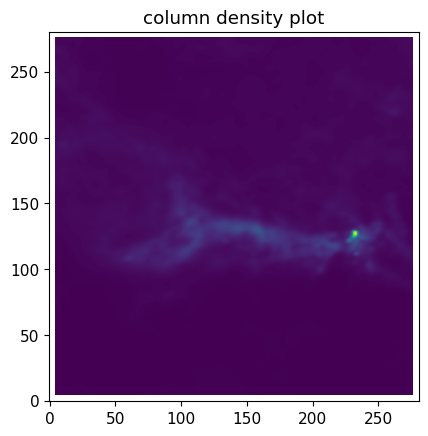

In [4]:
wcs = WCS(col_dens[0].header)
plt.title('column density plot')
plt.imshow(tau353)
plt.gca().invert_yaxis()

## making and plotting mask

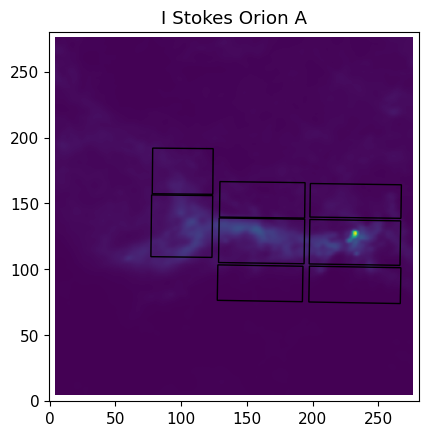

In [5]:
plt.imshow(tau353)
plt.title('I Stokes Orion A')
plt.gca().invert_yaxis()

regions_pix = []
for x in range(len(regions)):
    region0 = (RectangleSkyRegion(regions[x].center, regions[x].width, regions[x].height, regions[x].angle))
    regions_pix.append(region0.to_pixel(wcs))
    regions_pix[x].plot()
#plt.savefig('stokes')

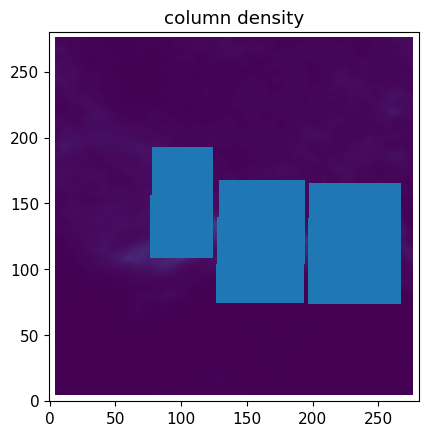

In [6]:
plt.imshow(tau353)
plt.title('column density')

ax = plt.subplot(1, 1, 1)
plt.gca().invert_yaxis()

mask_list = []

for x in range(len(regions_pix)):
    mask = regions_pix[x].to_mask()
    mask_list.append(mask)
    ax.add_artist(mask.bbox.as_artist())

In [7]:
#ax = plt.subplot(1, 1, 1)
tau353_list = []

for x in range(len(mask_list)):
    mask0 = mask_list[x].to_image(tau353.shape)
    
    mask_trial = np.logical_and(tau353, mask0 == 1)
    mask_coord = mask_trial.nonzero() 
    tau353_list.append(tau353[mask_coord]*(8.33*10**25)) ## converting to column density
    #tau353_list[x] = tau353_list[x][~np.isnan(tau353[x])] ##removing all nan values (i.e. from list [3])
    #plt.imshow(mask_trial)
    #plt.title('mask #' + str(x))
    #plt.show()

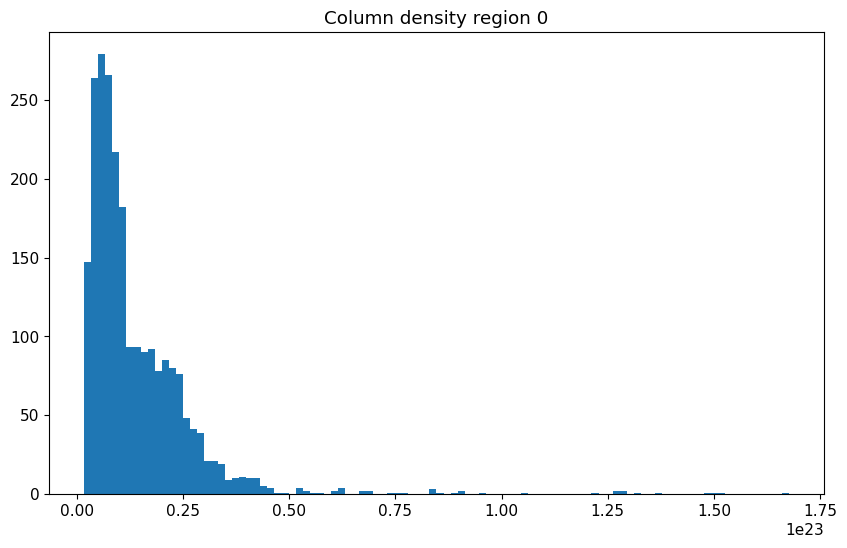

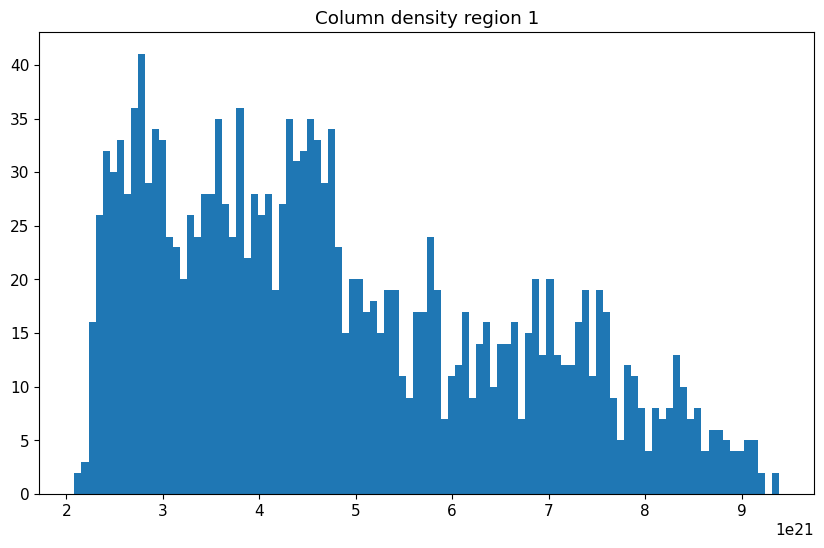

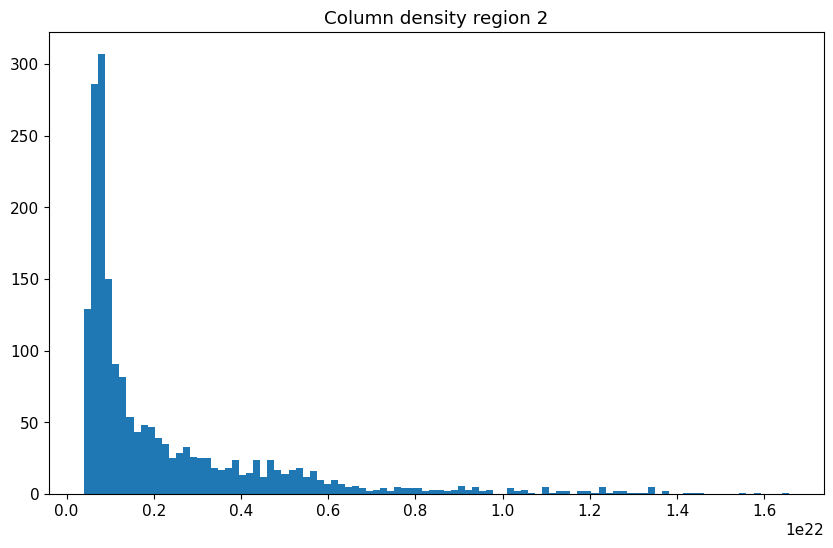

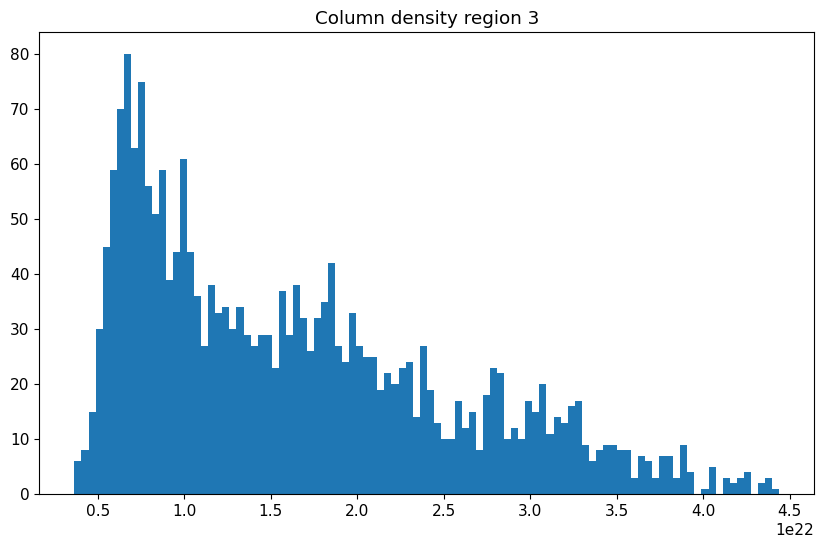

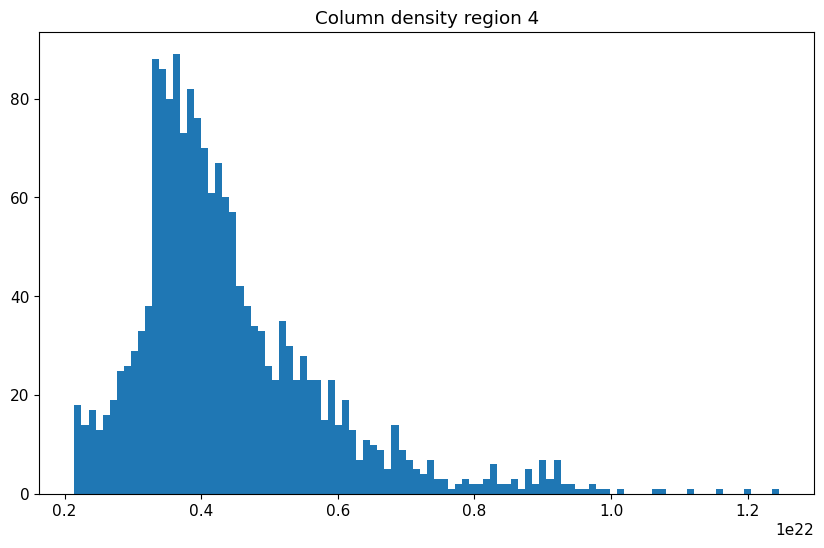

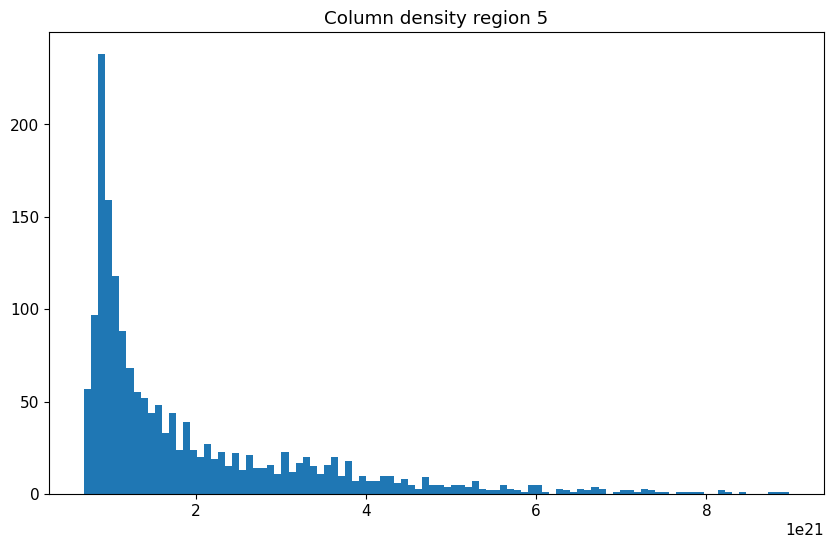

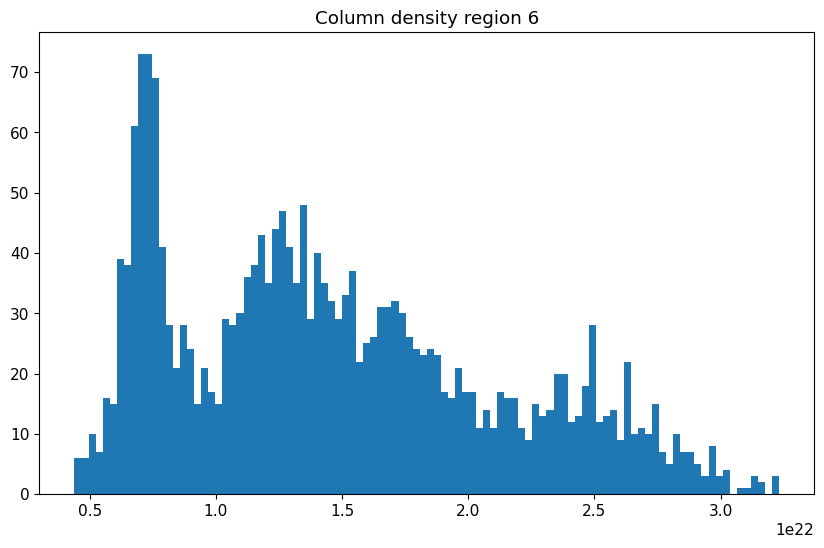

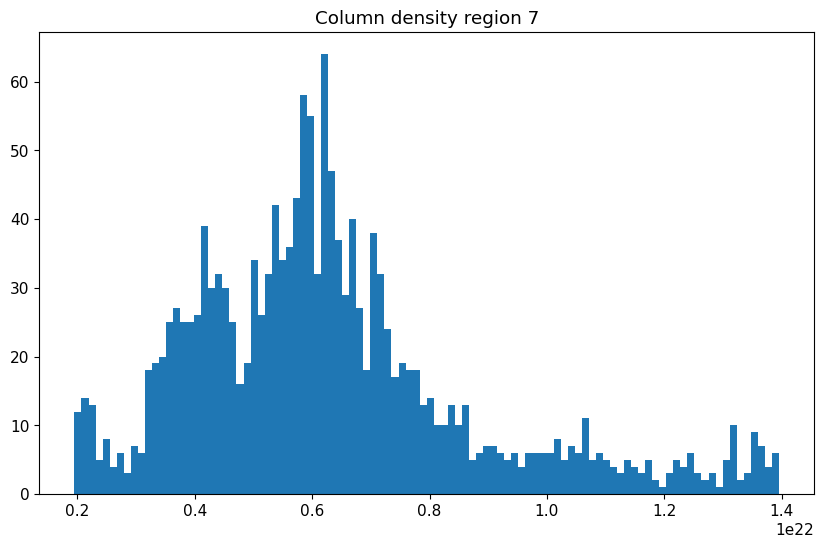

In [8]:
#hist, bins, patches = plt.hist(tau353_list[3], 100)

for x in range(len(tau353_list)):
    plt.figure(figsize = (10, 6))
    hist, bins, patches = plt.hist(tau353_list[x], 100)
    plt.title('Column density region ' + str(x))
    
#   plt.savefig('col_dens2_'+str(x))
    plt.show()


#plt.figure(figsize = (10, 6))
#hist, bins, patches = plt.hist(tau353_list[7], 100)
#plt.title('Column density region ' + str(7))
#plt.show()

#plt.savefig('col_dens_'+str(7))


In [9]:
pol_frac_list = []

for x in range(len(mask_list)):
    mask0 = mask_list[x].to_image(pol_frac.shape)
    
    mask_trial = np.logical_and(pol_frac, mask0 == 1)
    mask_coord = mask_trial.nonzero() 
    pol_frac_list.append(pol_frac[mask_coord])
    #pol_frac_list[x] = pol_frac_list[x][~np.isnan(pol_frac_list[x])] ##removing all nan values (i.e. from list [3])

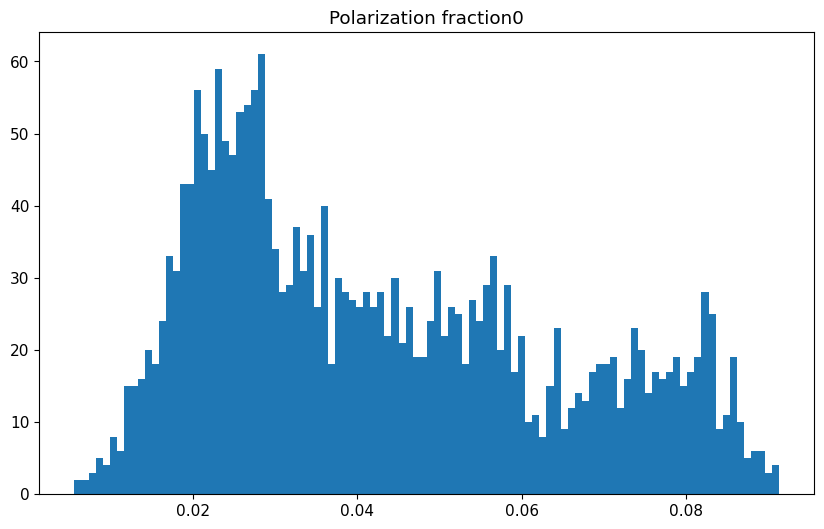

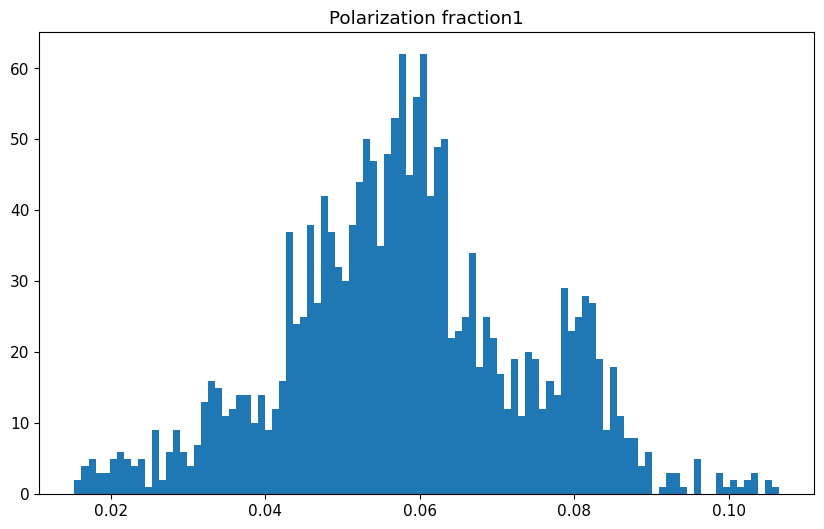

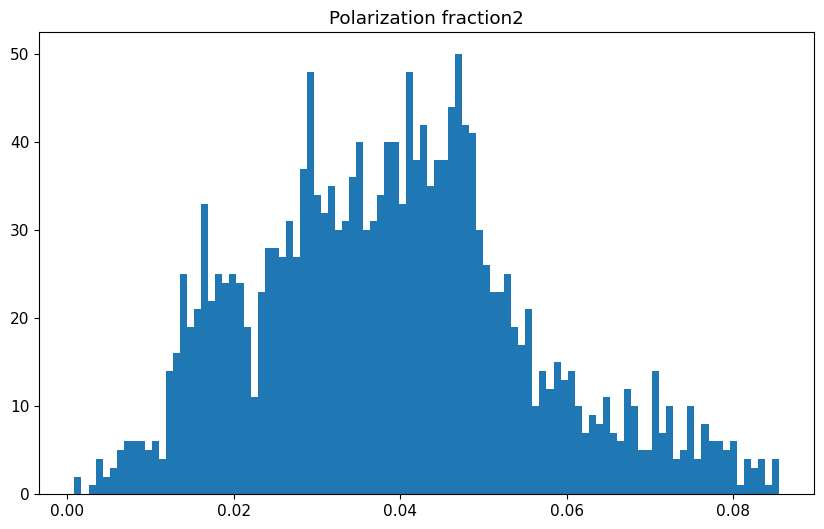

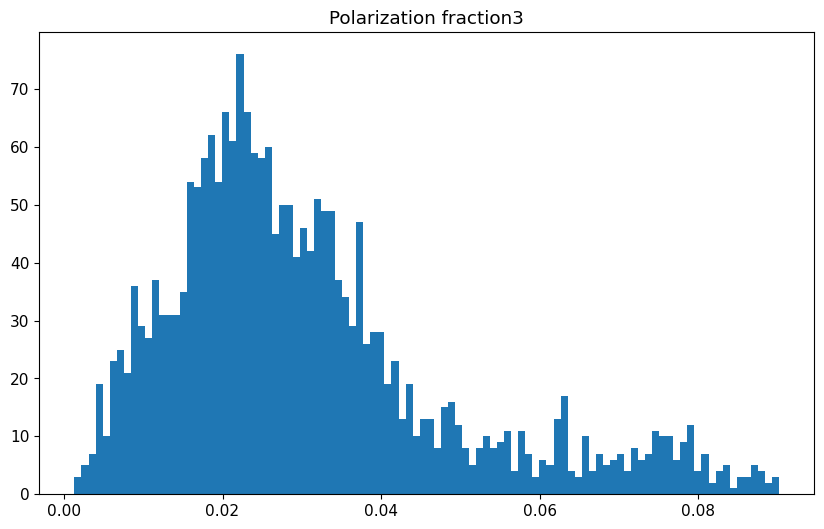

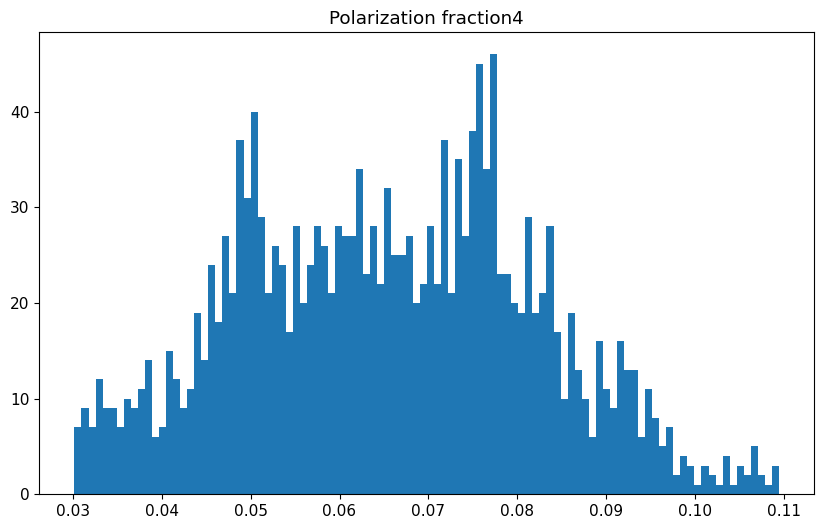

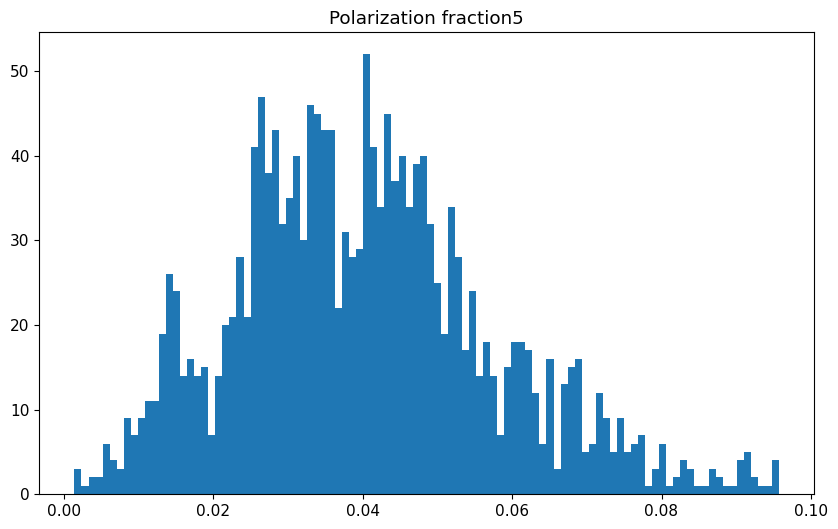

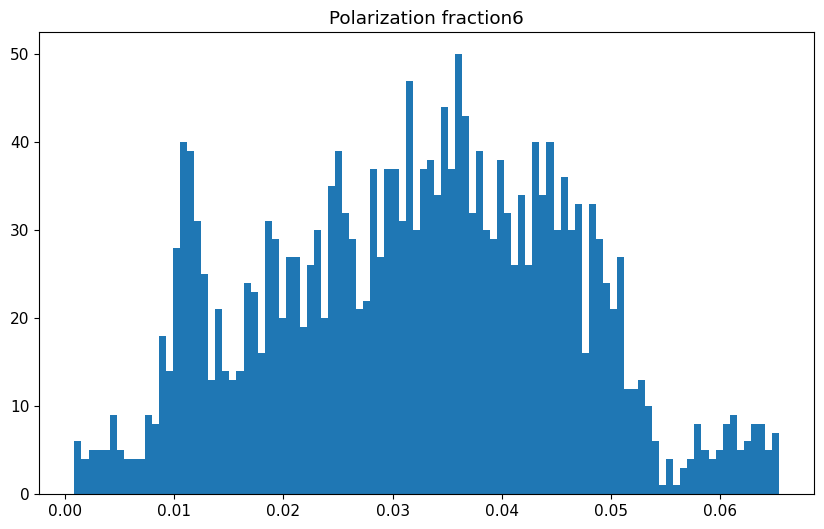

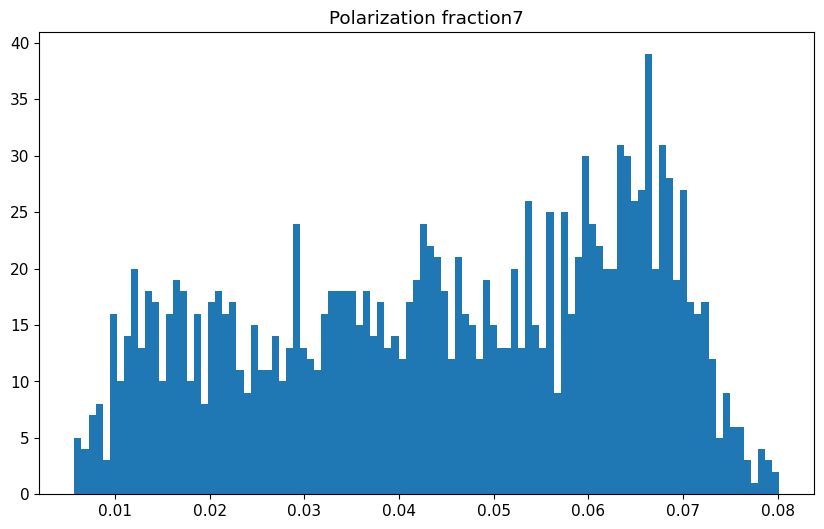

In [10]:
for x in range(len(pol_frac_list)):
    plt.figure(figsize = (10, 6))
    hist, bins, patches = plt.hist(pol_frac_list[x], 100)
    plt.title('Polarization fraction' + str(x))
    
#   plt.savefig('pol_frac2_'+str(x))
    plt.show()

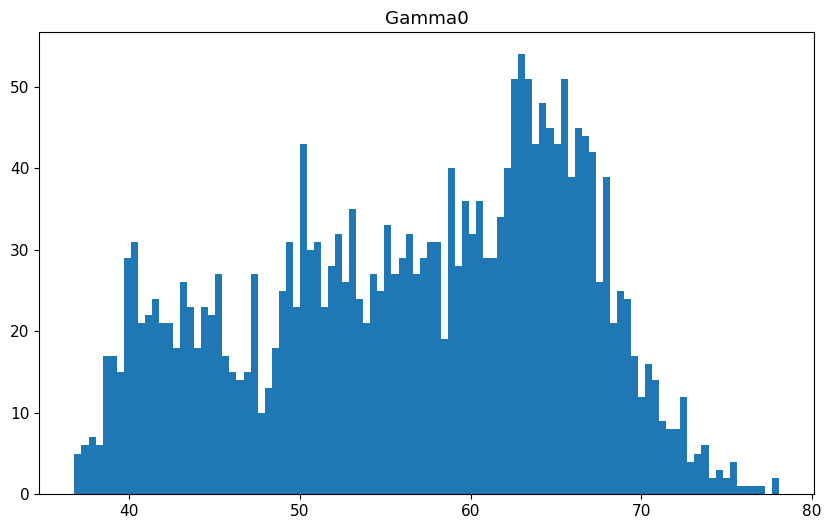

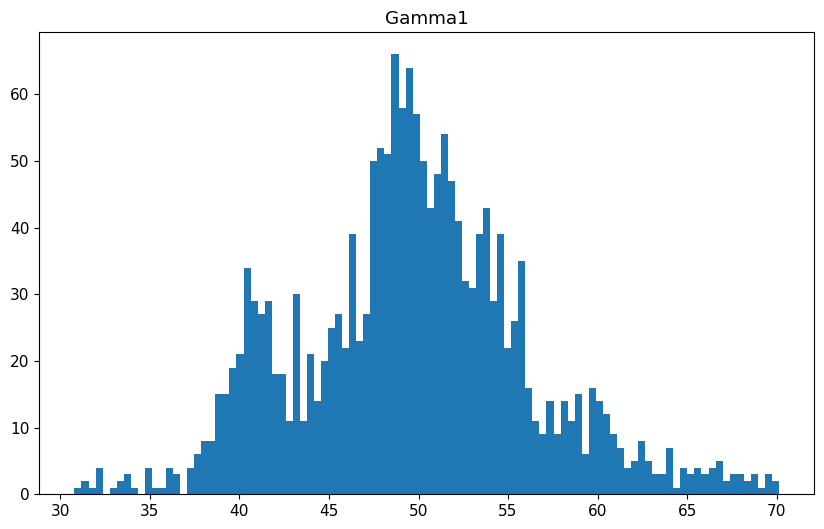

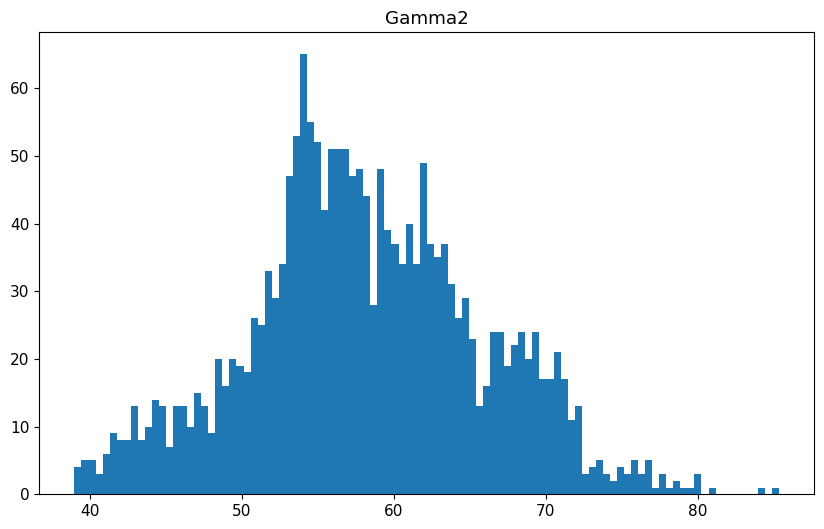

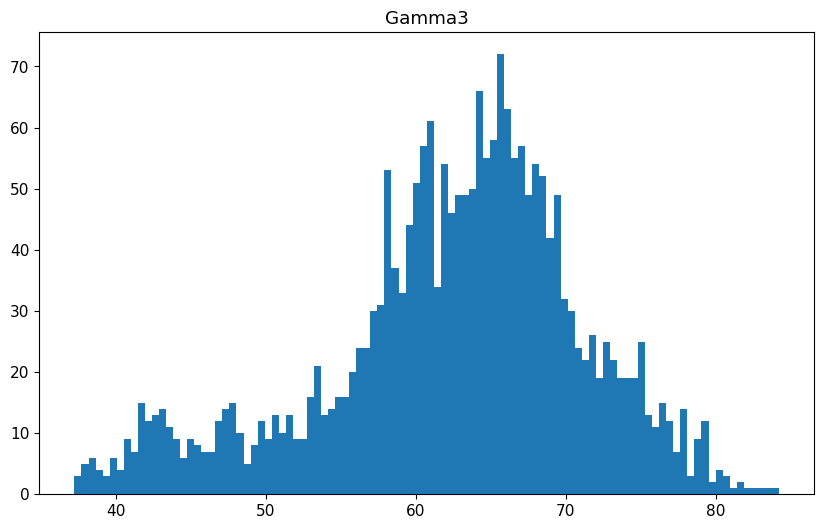

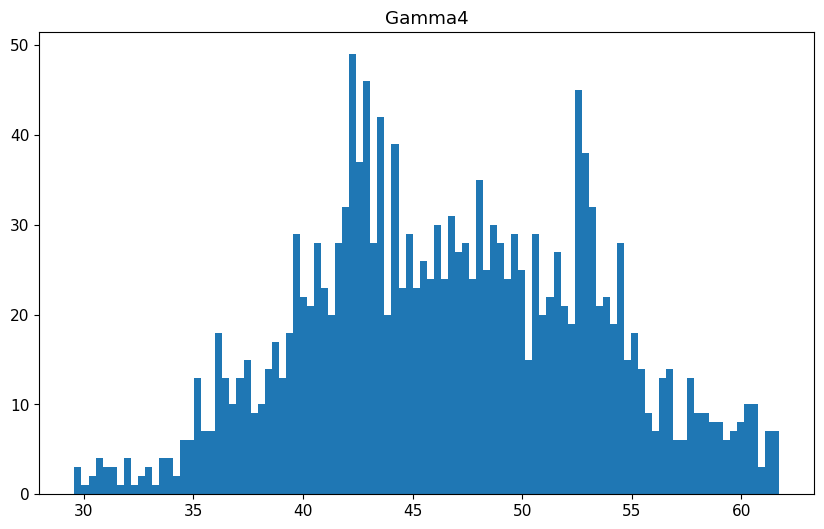

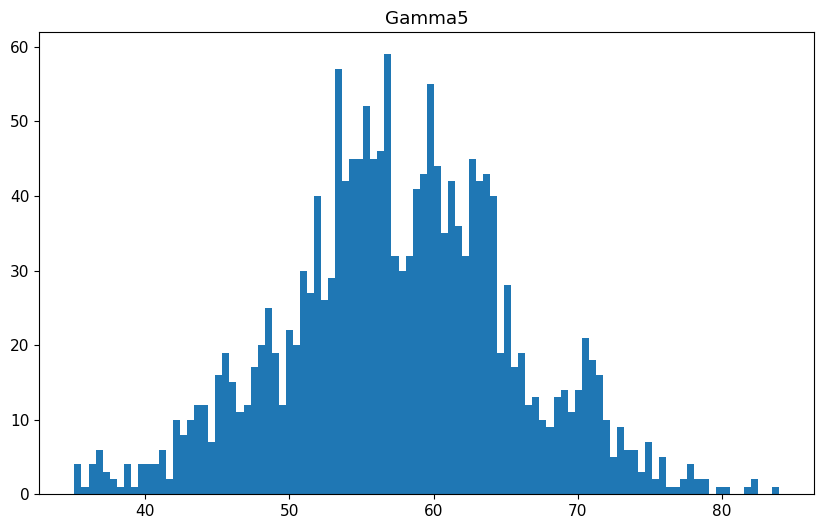

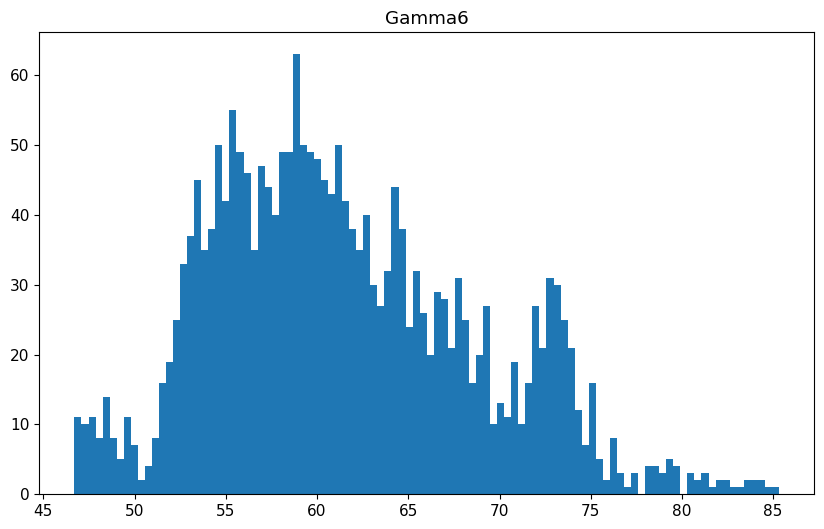

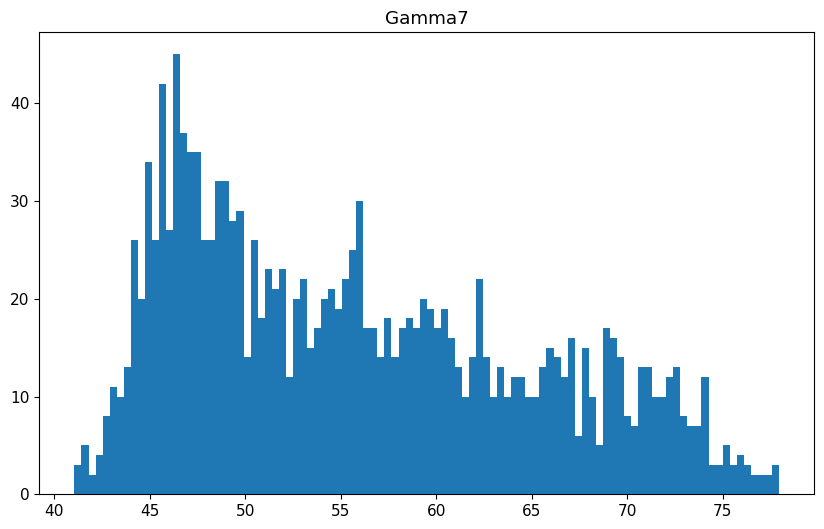

In [11]:
p_max = 0.15
p_0 = (3*p_max)/(3+p_max)
gamma_list = []

for x in range(len(pol_frac_list)):
    plt.figure(figsize = (10, 6))
    gamma = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in pol_frac_list[x]]
    #gamma = gamma[~np.isnan(gamma)]
    gamma_list.append(gamma)

    hist, bins, patches = plt.hist(gamma, 100)
    plt.title('Gamma'+ str(x))
#   plt.savefig('gamma2_' +str(x))
    plt.show()

#plt.figure(figsize = (0.1, 0.1))

#hist, bins, patches = plt.hist(gamma_list[7], 100)
#plt.title('gamma_'+ str(7))
#plt.savefig('gamma_'+str(7))
#plt.show()

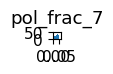

In [12]:
#for x in range(len(pol_frac_list)):
    #hist, bins, patches = plt.hist(pol_frac_list[x], 100)
    #plt.title('pol frac reg wo/cov '+ str(x))
    #plt.show()

plt.figure(figsize = (0.1, 0.1))

hist, bins, patches = plt.hist(pol_frac_list[6], 100)
plt.title('pol_frac_'+ str(7))
#plt.savefig('pol_frac_'+str(7))
plt.show()

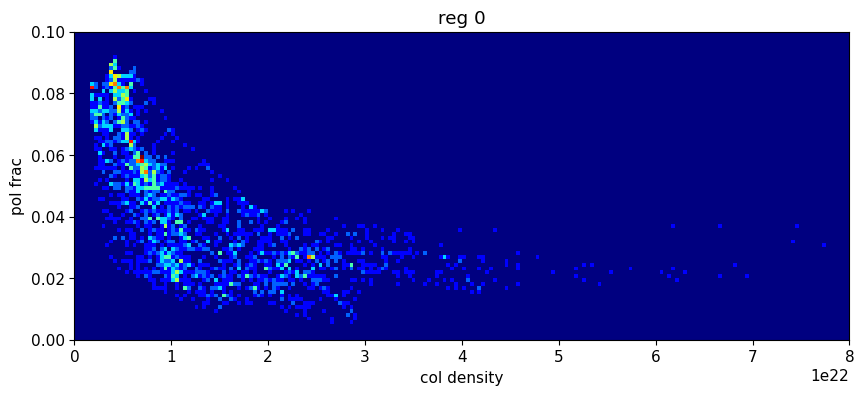

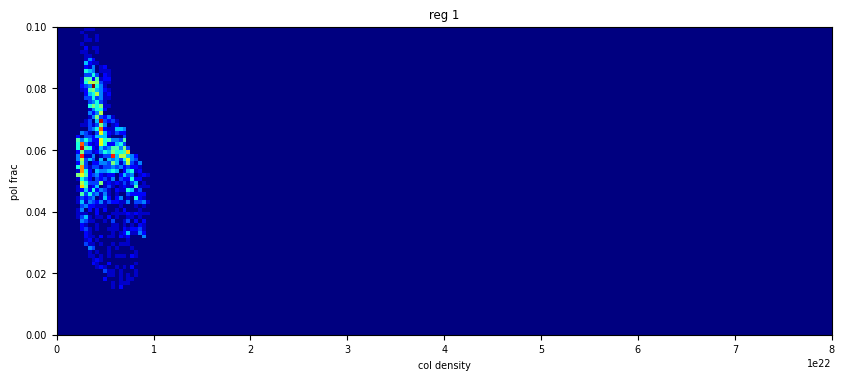

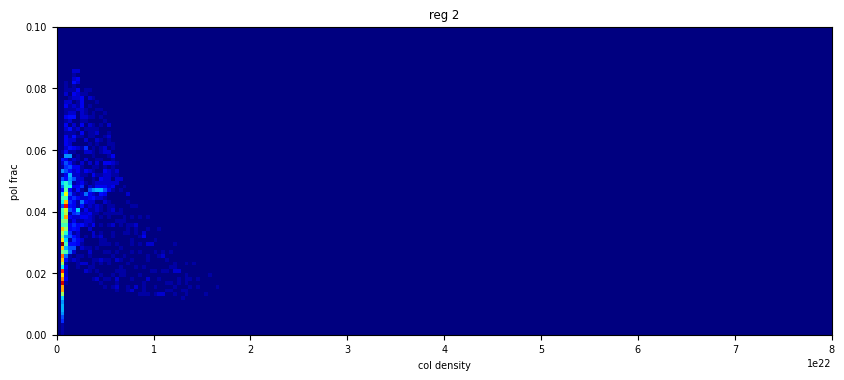

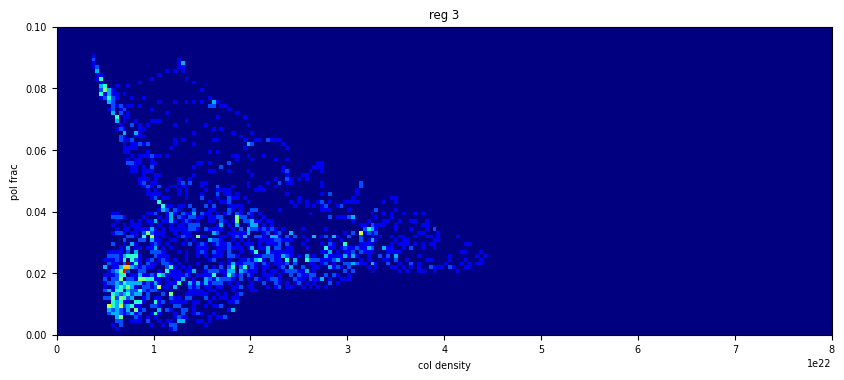

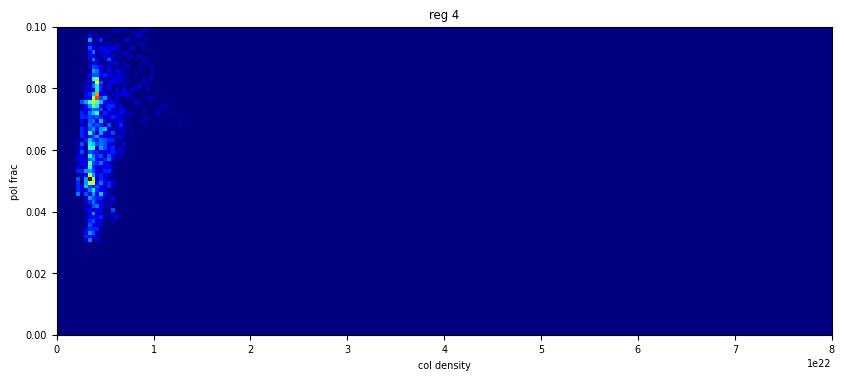

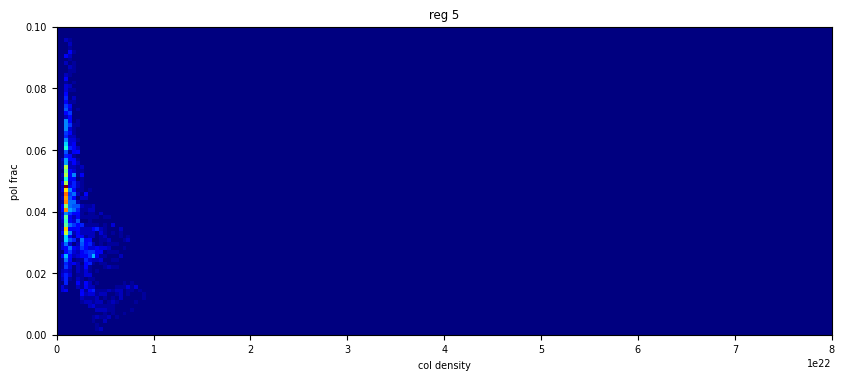

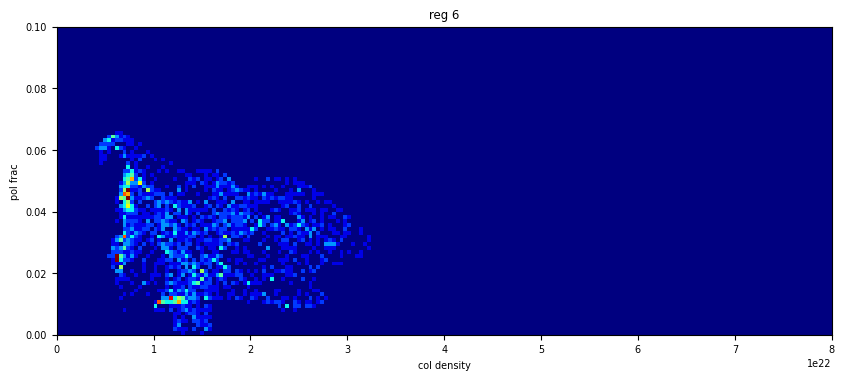

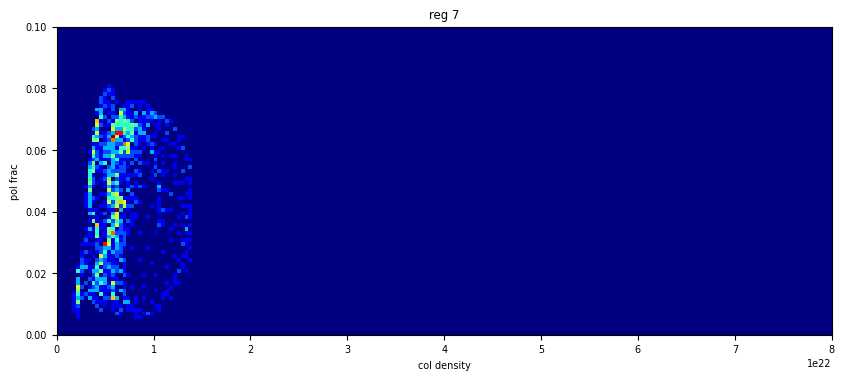

In [13]:

for x in range(len(pol_frac_list)):
    plt.figure(figsize = (10,4))
    plt.hist2d(tau353_list[x], pol_frac_list[x], range = [[0, 0.8*10**23], [0, 0.1]],  bins=(200, 80), cmap=plt.cm.jet)
    plt.title('reg ' + str(x))
    plt.xlabel('col density')
    plt.ylabel('pol frac')
#   plt.xlim(0, 0.001)
    plt.rcParams.update({'font.size': 7})
    plt.show()
    


8

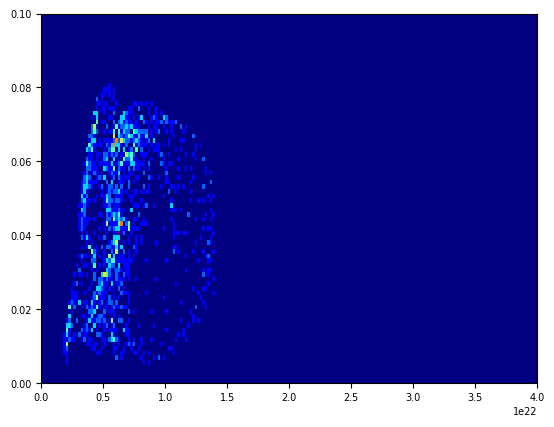

In [14]:
#hist = plt.hist2d(tau353_list[0], pol_frac_list[0], range = [[0, 0.001], [0, 0.1]],  bins=(200, 80), cmap=plt.cm.jet)
hist2d_list = []
xedges_list = []
yedges_list = []
for x in range (len(tau353_list)):
    hist, xedges, yedges, im = plt.hist2d(tau353_list[x], pol_frac_list[x], range = [[0, 0.4*10**23], [0, 0.1]],  bins=(200, 80), cmap=plt.cm.jet)
    hist2d_list.append(hist)
    xedges_list.append(xedges)
    yedges_list.append(yedges)
len(xedges_list)

<Figure size 1000x400 with 0 Axes>

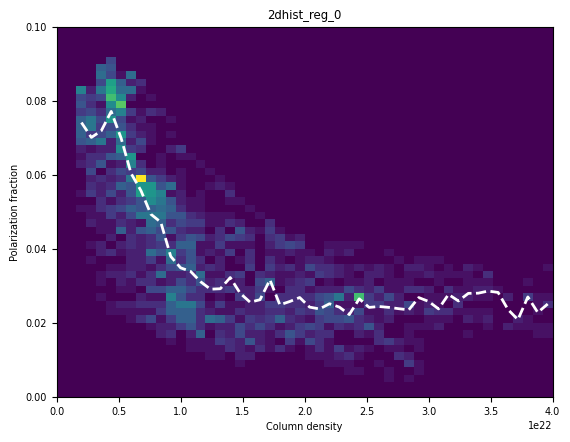

<Figure size 1000x400 with 0 Axes>

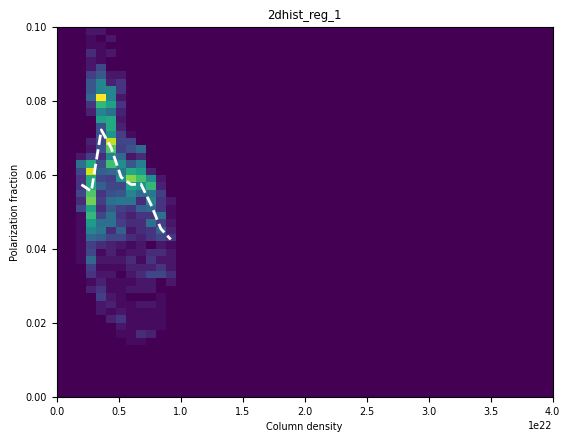

<Figure size 1000x400 with 0 Axes>

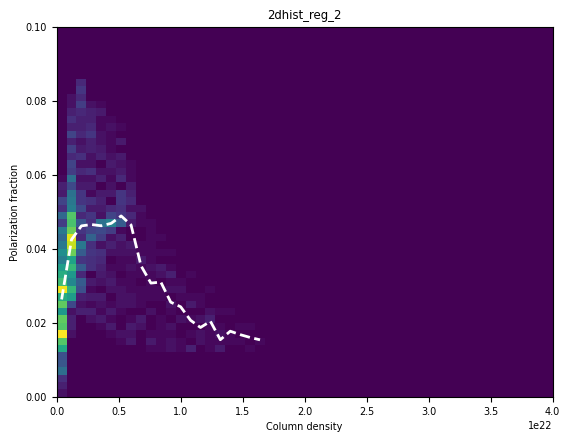

<Figure size 1000x400 with 0 Axes>

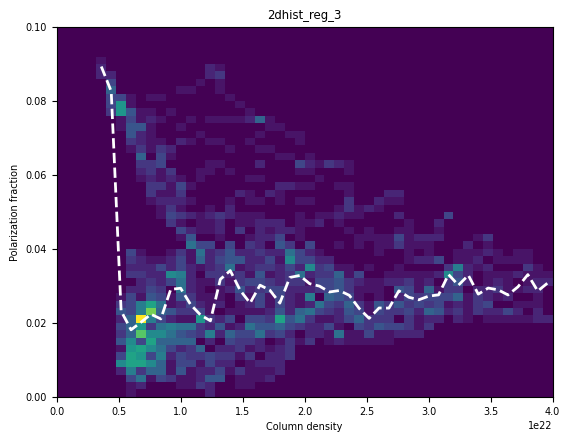

<Figure size 1000x400 with 0 Axes>

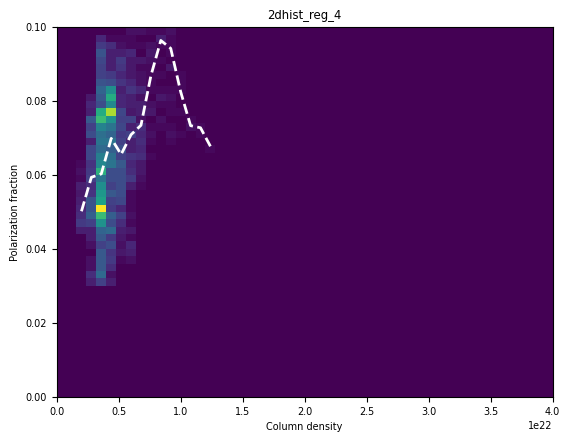

<Figure size 1000x400 with 0 Axes>

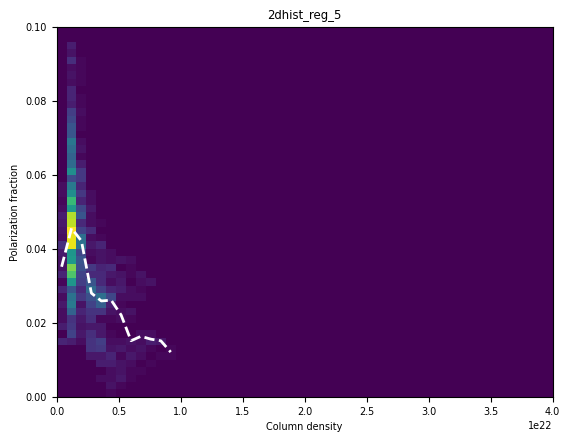

<Figure size 1000x400 with 0 Axes>

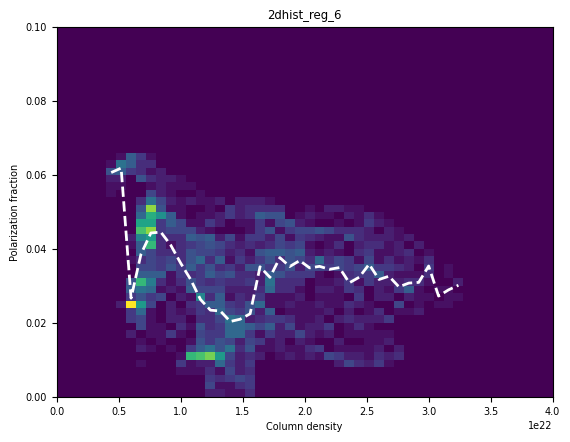

<Figure size 1000x400 with 0 Axes>

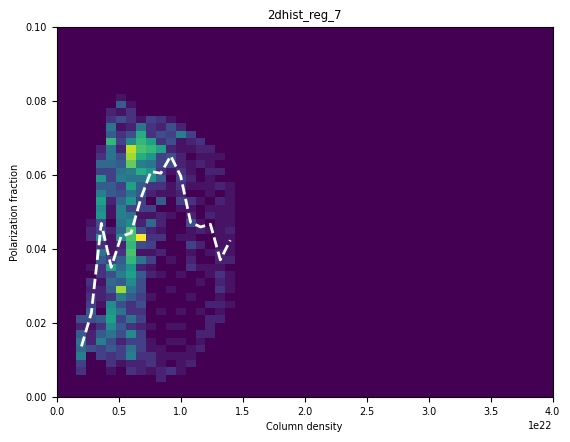

In [15]:
for a in range(len(tau353_list)):
    x = tau353_list[a]
    y = pol_frac_list[a]

    plt.figure(figsize = (10,4))

    # Create a 2D histogram
    fig, ax = plt.subplots()
    hist, xedges, yedges, im = ax.hist2d(x, y, bins=50, range = [[0, 0.4*10**23], [0, 0.1]], cmap=plt.cm.viridis)

    # Select a range of x values
    x_range = (0, 0.2*10**23)
    x_indices = np.where((xedges >= x_range[0]) & (xedges <= x_range[1]))[0]

    # Compute the median of the y values over the selected x range
    y_values = []
    for i in x_indices:
        y_bin = hist[i, :]
        y_values.extend(y_bin[y_bin > 0])
    median_y = np.median(y_values)

    # Plot the median as a function of x
    x_centers = (xedges[:-1] + xedges[1:]) / 2
    median_y_values = []
    for i in range(len(x_centers)):
        x_center = x_centers[i]
        x_bin = hist[i, :]
        y_bin_indices = np.where((x >= xedges[i]) & (x < xedges[i+1]))[0]
        if len(y_bin_indices) > 0:
            y_bin = y[y_bin_indices]
            median_y_bin = np.median(y_bin)
            median_y_values.append(median_y_bin)
        else:
            median_y_values.append(np.nan)
    ax.plot(x_centers, median_y_values, 'w--', lw=2)
    plt.ylabel('Polarization fraction')
    plt.xlabel('Column density')
    plt.title('2dhist_reg_'+str(a))
#   plt.savefig('2dhist_reg_'+str(a))

    plt.show()


In [16]:
mask_list[0].data

masked_data = np.ma.masked_array(pol_frac, mask_list[0].data)

MaskError: Mask and data not compatible: data size is 78961, mask size is 2556.

In [ ]:
mask_list[0].shape
pol_frac.shape